In [5]:
import pandas as pd
import statsmodels
import numpy as np
import matplotlib.pyplot as plt

#pandas plotting
from pandas.plotting import autocorrelation_plot

#autocorrelation
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

#ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [6]:
df = pd.read_csv("AirPassengers.csv",index_col=0,parse_dates=['Month'])

In [7]:
df.columns=['Passengers']

In [8]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Decomposition

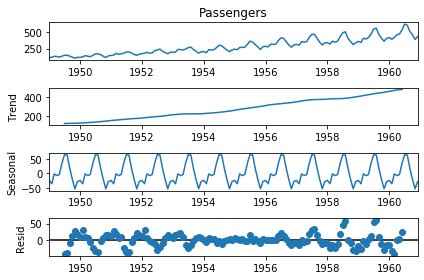

In [9]:
#decompose dataset to identify trend and seasonality
fig = seasonal_decompose(df.Passengers).plot()

# Detrend

In [10]:
log_df = np.log(df)

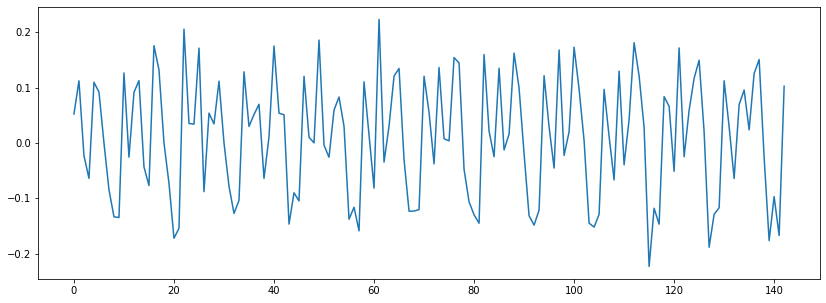

In [11]:
plt.figure(figsize=[14,5])
fig = plt.plot(log_df.diff(periods=1).values[1:])

# Autocorrelation

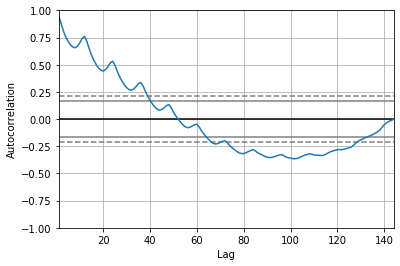

In [12]:
fig = autocorrelation_plot(df.Passengers)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


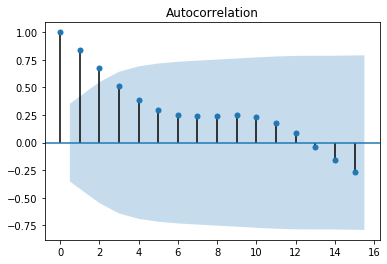

In [13]:
#identify autocorrelation and lag step
fig = plot_acf(acf(df.Passengers,nlags=30))

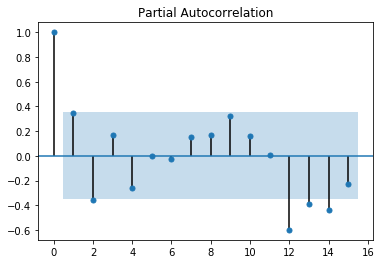

In [14]:
fig = plot_pacf(pacf(df.Passengers,nlags=30))

# Parameters

### Order of Differencing (d)

Since we can see that there is a seasonal trend, we know that the order of differencing will be at least one

Looking at the above graph we can see that the autocorrelation is positive for at least 10 lags, this means that we should use an order of differencing of 2 (ARIMA models become hard to calculate at any higher order).

There's a lot of complicated maths that _can_ explain why but essentially because the autocorrelation is positive for so many lags in a row, an order of differencing of 1 will not be enough to make this trend stationary

In [15]:
d = 2

### Order of AR (p)

We can find out the order of AR by counting the number of lags that cross the significance line on the PACF plot

Ideally you want to use the most simple model that you can justify. In this case I will use an AR order of 2 counting the two values at 12 and 14 on the graph as we can see that most other lag values just barely cross the significance line. 

In [16]:
p = 2

### Order of MA (q)

The order of MA can be identified in a similar fashion to the order of AR, except this time we use the ACF plot

If we again look at the number of lag values that exceed the significance value we come up with a value of 2 for order of MA as well

In [17]:
q = 2

### Word of Caution

While there are general rules for identifiying what parameters to use, it is best to do hyper parameter optimisiation to check that the values you obtained are actually optimal for your model.

For example you can check to see if the model is stationary after

# Test Train Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train,test = train_test_split(df,train_size=0.8,shuffle=False)

# Model

In [20]:
model = ARIMA(train.Passengers,order=[p,d,q])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [21]:
model_fit = model.fit(disp=0,typ="levels")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [22]:
# one-step out-of sample forecast
forecast = model_fit.forecast()

In [23]:
prediction = forecast[0][0]

In [24]:
true_value = test[:1].values[0][0]

In [25]:
print(f"{prediction}, {true_value}")

510.0940356314944, 505


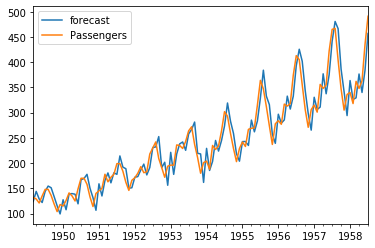

In [26]:
model_fit.plot_predict(dynamic=False)
plt.show()